In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vals1, vals2, vals3 = [], [], []
with open("redshift.dat", 'r') as f:
    for line in f:
        vals = line.split()
        vals1.append(float(vals[0]))
        vals2.append(float(vals[1]))
        vals3.append(float(vals[2]))
vals1 = np.array(vals1)
vals2 = np.array(vals2)
vals3 = np.array(vals3)

According to Larry Wasserman, the author of the very famous "All of Statistics", the following is redshift data that one gets from measuring something or other about galaxies (I don't know; he doesn't give much detail aside from just saying this is about space; see https://www.stat.cmu.edu/~larry/all-of-statistics/index.html to see what I mean.)  Anyway, we can at least visualize the data in a straightforward fashion.  

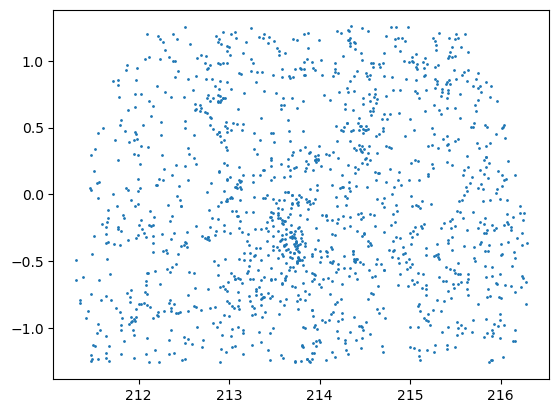

In [4]:
plt.scatter(vals1, vals2, s=1.)

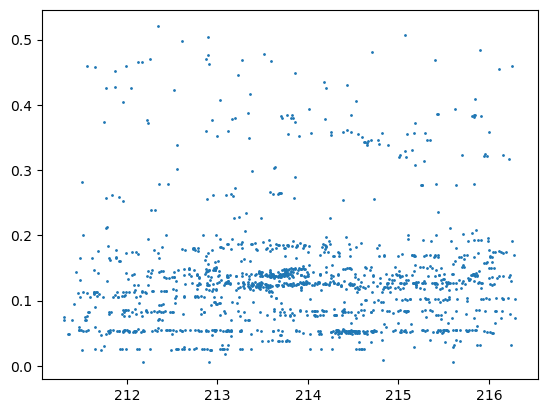

In [5]:
plt.scatter(vals1, vals3, s=1.)

A natural question that emerges then is how to characterize the data set `vals2` (which again has something to do with space).  To do that, and thus explore the bias/variance tradeoff we've beeen discussing in class, we generate a histogram of `vals2`.  

## Histograms

To define the problem, we suppose that we have data $D = \left\{X_{j}\right\}_{j=1}^{N_{D}}$ where are i.i.d. and $X_{j}\sim p(x)$, where $p(x)$ is some unknown distribution.  A _histogram_, say $\hat{p}_{H}(x)$ is a model/estimator of $p(x)$.  

To construct it, if we know $x\in [a,b]$, we divide $[a,b]$ into $K$ bins of width $\delta x  = (b-a)/K$ so that 

$$
[a,b]=\cup_{l=1}^{K}[a_{l},b_{l}), ~ a_{1}=a, ~ b_{K} = b, ~b_{l}=a_{l+1}, ~ b_{l}-a_{l} = \delta x
$$ 

Define an _indicator_ function for a set $A$ as $I_{A}(x)$ so that 

$$
I_{A}(x) = \left\{
\begin{array}{rl}
1 & x \in A \\ 
0 & x \notin A
\end{array}
\right.
$$

Then $\hat{p}_{H}(x)$ is defined to be

$$
\hat{p}_{H}(x) = \frac{1}{\delta x} \sum_{l=1}^{K} \hat{p}_{l} I_{[a_{l},b_{l})}(x), ~ \hat{p}_{l} = \frac{N_{l}}{N_{D}}
$$

where $N_{l}$ is the number of data points in the $l^{th}$-bin, i.e.

$$
N_{l} = \sum_{j=1}^{N_{D}}I_{[a_{l},b_{l})}(X_{j}),
$$

so that $\sum_{l=1}^{K}N_{l} = N_{D}$.

**Problem 1**: Using the `vals2` data set:

* Plot the histogram (use `plt.hist`) using $K=2$.
* Plot the histogram (use `plt.hist`) using $K=20$.
* Plot the histogram (use `plt.hist`) using $K=200$.

How would you describe the differences in these plots in terms of bias and variance?  

Using a ton of theory we cannot get into right now, one can show that the cross-validated error in using a $K$-bin histogram estimator is given by:

$$
E(K) = \frac{2}{\delta x (N_{D}-1)} - \delta x\frac{N_{D}+1}{N_{D}-1}\sum_{l=1}^{K}\left(\frac{\hat{p}_{l}}{\delta x}\right)^{2}
$$

Implement this and then explore how the cross-validated error changes as a function of bin count. Can you find an optimal bin count for the given data set?  

In [11]:
def cross_val(bincnt, samples):
    nd = samples.size
    dx = (np.max(samples)-np.min(samples))/bincnt
    hist, bins = np.histogram(samples, bins=bincnt, density=True)
    error = 2./(dx*(nd-1)) - dx * (nd+1.)/(nd-1.) * np.sum( hist**2. )
    return bins, hist, error

In [12]:
bincnts = np.arange(1, 100) # Explore bin counts 
errors = np.zeros(len(bincnts))
for jj, bincnt in enumerate(bincnts):
    bins, hist, error = cross_val(bincnt, vals2)
    errors[jj] = error

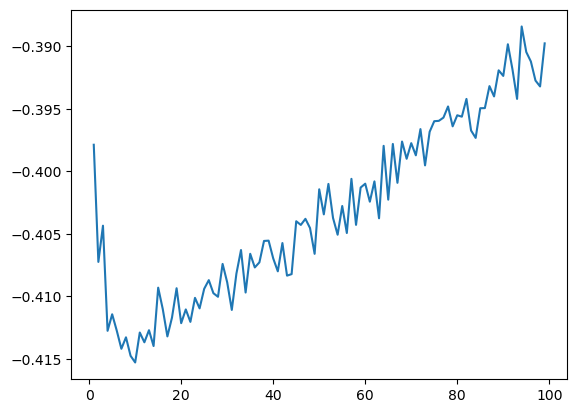

In [13]:
plt.plot(bincnts, (errors))

In [ ]:
plt.hist(vals2, bins=, density=True);

**Problem 3**: Now lets build theory around our experimental results.  
* Show that $\int_{a}^{b}\hat{p}_{H}(x)dx = 1$
* Show that the probability of being in the interval $[a_{l},b_{l}]$ is given by $p_{l}=\int_{a_{l}}^{b_{l}}p(x)dx$.
* (Graduate) Show that the probability that there are $N_{l}$ particles in $[a_{l},b_{l}]$ is given by $\tilde{p}_{l}(N_{l})$ where
$$
\tilde{p}_{l}(N_{l}) = \begin{pmatrix}N_{D}\\N_{l}\end{pmatrix}p^{N_{l}}_{l}(1-p_{l})^{N_{D}-N_{l}}
$$
* Show, using the prior result, that 
$$
\sum_{N_{l}=0}^{N_{D}}\tilde{p}_{l}(N_{l}) = 1.
$$
* (Graduate) Show that 
$$
\mathbb{E}[N_{l}] = \sum_{N_{l}=0}^{N_{D}}N_{l}\tilde{p}_{l}(N_{l}) = N_{D}p_{l}
$$
To do this, use the fact that 
$$
N_{l}\begin{pmatrix}N_{D}\\N_{l}\end{pmatrix} = N_{D}\begin{pmatrix}N_{D}-1\\N_{l}-1\end{pmatrix}
$$
* (Graduate) Show that 
$$
\mathbb{E}[N_{l}^{2}] = N_{D}(N_{D}-1)p^{2}_{l} + N_{D}p_{l}
$$
* Using all of the above results, show that for $x\in[a_{l},b_{l}]$ that 
$$
\mathbb{E}[\hat{p}_{H}(x)] = \frac{p_{l}}{\delta x}
$$
What is the corresponding bias in your estimate?  
* Using all of the above results, show that for $x\in [a_{l},b_{l}]$ that $\mathbb{V}[\hat{p}_{H}(x)]$, where $\mathbb{V}[\hat{p}_{H}(x)] = \mathbb{E}[(\hat{p}_{H}(x) - \mathbb{E}[\hat{p}_{H}(x)])^{2}]$ is given by
$$
\mathbb{V}[\hat{p}_{H}(x)] = \frac{1}{(\delta x)^{2}N_{D}}p_{l}(1-p_{l})
$$

In words, explain how the interval width $\delta x$ controls the bias/variance tradeoff in our histogram estimator.  How does this better help you understand your empirical results from the prior problems?  